In [ ]:
#importing important libraris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('https://raw.githubusercontent.com/softwareWCU/Data-Preprocessing-for-ML-using-Titanic-Dataset/main/titanic2.csv')




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  909 non-null    int64  
 1   Survived     909 non-null    int64  
 2   Pclass       909 non-null    object 
 3   Name         909 non-null    object 
 4   Sex          909 non-null    object 
 5   Age          710 non-null    float64
 6   SibSp        909 non-null    int64  
 7   Parch        909 non-null    int64  
 8   Ticket       909 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        208 non-null    object 
 11  Embarked     907 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 85.3+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,909.000000,909.000000,710.000000,909.000000,909.000000,891.000000
mean,446.040704,0.387239,29.603169,0.522552,0.380638,31.431149
std,257.212740,0.487387,14.566894,1.098050,0.802185,46.797866
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,445.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,669.000000,1.000000,38.000000,1.000000,0.000000,30.847900
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,909.000000,909.000000,710.000000,909.000000,909.000000,891.000000
mean,446.040704,0.387239,29.603169,0.522552,0.380638,31.431149
std,257.212740,0.487387,14.566894,1.098050,0.802185,46.797866
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,445.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,669.000000,1.000000,38.000000,1.000000,0.000000,30.847900
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,199
SibSp,0
Parch,0
Ticket,0
Fare,18


In [ ]:
df.drop(columns=['Cabin'],inplace=True)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,199
SibSp,0
Parch,0
Ticket,0
Fare,18


In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare']=df['Fare'].fillna(df['Fare'].mode()[0])

In [ ]:
print("after filling missing values")
df.isnull().sum()

after filling missing values


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
num_cols=['Age']
for col in num_cols:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

Text(0.5, 1.0, 'box plot of Age after outlier handling')

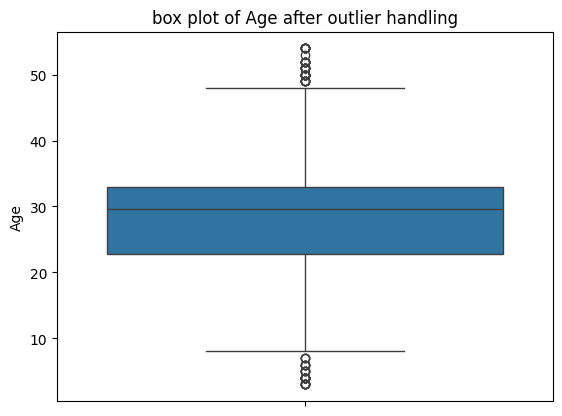

In [ ]:
sns.boxplot (data=df['Age'])
plt.title('box plot of Age after outlier handling')

In [ ]:
#detecting duplicate dat VALUES


In [ ]:
df_copy = df.copy()

In [ ]:
df.duplicated().sum()
np.int64(10)

np.int64(10)

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
904,False
905,False
906,True
907,False


In [ ]:
df=df.drop_duplicates()

In [ ]:
df['Sex'] = df['Sex'].replace('male', 'Male')
df['Embarked'] = df['Embarked'].replace(['s','S'], 'southampton')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Extracting Title from Name as new feature
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
title_map = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Dr':5, 'Rev':6, 'Col':7, 'Major':8, 'Mlle':2, 'Countess':3, 'Mme':3, 'Don':1, 'Lady':3, 'Sir':1, 'Jonkheer':1, 'Capt':7}
df['Title'] = df['Title'].map(title_map).fillna(0)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,southampton,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,southampton,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,southampton,3.0
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,southampton,1.0


In [ ]:
# --- Fix Pclass column if it contains strings like '1st', '2nd', '3rd ' ---
df['Pclass'] = df['Pclass'].astype(str)              # ensure string type
df['Pclass'] = df['Pclass'].str.replace('st', '', regex=False)
df['Pclass'] = df['Pclass'].str.replace('nd', '', regex=False)
df['Pclass'] = df['Pclass'].str.replace('rd', '', regex=False)
df['Pclass'] = df['Pclass'].str.strip()              # remove any spaces
df['Pclass'] = df['Pclass'].astype(int)              # convert to numeric


In [ ]:
# Re-checking and filling any remaining NaNs to ensure data cleanliness for relevant features
print("Checking for NaNs before feature selection:")
print(df[features].isnull().sum())

# Ensure 'Fare' column has no NaNs. Re-applying fillna if necessary.
# It's crucial that this column is clean for model training.
if df['Fare'].isnull().any():
    print("Filling remaining NaNs in 'Fare' column...")
    # Calculate mode again just to be safe, although it should be stable if data hasn't changed.
    fare_mode = df['Fare'].mode()[0]
    df['Fare'] = df['Fare'].fillna(fare_mode)
    print("NaNs in 'Fare' filled.")
else:
    print("'Fare' column already clean.")

print("\nNaNs after re-check and fill:")
print(df[features].isnull().sum())



from sklearn.preprocessing import LabelEncoder

"""Encoding Techq

1.   **One Hot Encoding** : creating or dumpies in new columns : used for nominal categorical data columns
2.   **Label Encoding**: used for ordinal categorical data columns



"""
# Encode categorical features
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])
df['Embarked'] = label.fit_transform(df['Embarked'])

# Select important features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Title']
target = 'Survived'

X = df[features]
y = df[target]


Checking for NaNs before feature selection:
Pclass    0
Sex       0
Age       0
Fare      0
SibSp     0
Parch     0
Title     0
dtype: int64
'Fare' column already clean.

NaNs after re-check and fill:
Pclass    0
Sex       0
Age       0
Fare      0
SibSp     0
Parch     0
Title     0
dtype: int64


In [ ]:
"""**Handle Outliers (Using IQR)**"""

for col in ['Age', 'Fare']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))

In [ ]:
from sklearn.model_selection import train_test_split

"""**Data Splitting: 70% Train, 15% Validation, 15% Test**"""

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {X_train.shape}, Validation: {X_valid.shape}, Test: {X_test.shape}")


Train: (583, 7), Validation: (125, 7), Test: (126, 7)


KNN Model Evaluation Metrics:

Confusion Matrix:


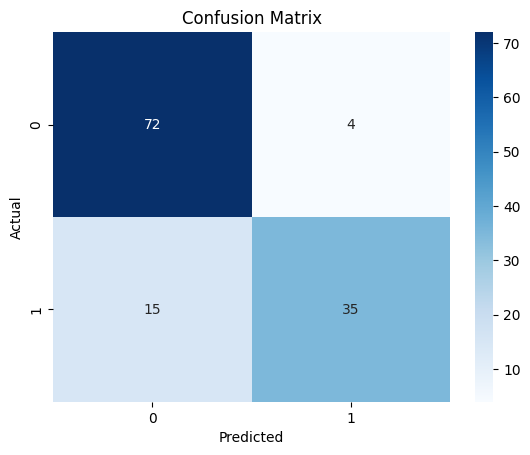

Accuracy: 0.8492063492063492
Precision: 0.8974358974358975
Recall (Sensitivity): 0.7
F1 Score: 0.7865168539325843
ROC-AUC: 0.8236842105263158

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.88        76
           1       0.90      0.70      0.79        50

    accuracy                           0.85       126
   macro avg       0.86      0.82      0.83       126
weighted avg       0.86      0.85      0.84       126

Predicted Survival for unseen Passenger: 0 (0=Not Survived, 1=Survived)
Confusion Matrix:
[[35 41]
 [13 37]]


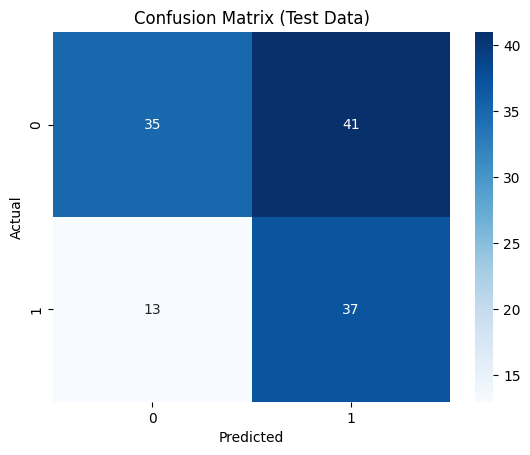

Test Accuracy: 0.571
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.46      0.56        76
           1       0.47      0.74      0.58        50

    accuracy                           0.57       126
   macro avg       0.60      0.60      0.57       126
weighted avg       0.63      0.57      0.57       126



In [ ]:
from sklearn.preprocessing import StandardScaler

"""standaization : mean , std

normalization : rang 0 -1

Robust Scalling IQR median

**Standardize features**
"""

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier

"""**Model Training: K-Nearest Neighbors**"""

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

"""**Prediction**"""

y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score

print("KNN Model Evaluation Metrics:")

"""**Model Evaluation and Metrics Interpretation**"""

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

acc = accuracy_score(y_test, y_pred)
print("Accuracy:",acc)

prec = precision_score(y_test, y_pred)
print("Precision:",prec)

rec = recall_score(y_test, y_pred)
print("Recall (Sensitivity):",rec)

f1 = f1_score(y_test, y_pred)
print("F1 Score:",f1)

roc = roc_auc_score(y_test, y_pred)
print("ROC-AUC:",roc)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

"""Predict Survival for a Single New Passenger


# Example:
 Pclass=2, Sex=male(0), Age=30, Fare=20.5, SibSp=1, Parch=0, Title=1
"""

sample_passenger = pd.DataFrame(
    [[2, 0, 30, 20.5, 1, 0, 1]],
    columns=X.columns
)

sample_passenger_scaled = scaler.transform(sample_passenger)

predicted_survival = knn.predict(sample_passenger_scaled)

print(f"Predicted Survival for unseen Passenger: {predicted_survival[0]} (0=Not Survived, 1=Survived)")

# Make sure X_test is a DataFrame with same columns as training data
X_test_df = pd.DataFrame(X_test, columns=X.columns)

X_test_scaled = scaler.transform(X_test_df)

y_pred_test = knn.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Accuracy
acc = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {acc:.3f}")

# Detailed Report
report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(report)